# Market Basket Analysis

This data set is created only for the learning purpose of the customer segmentation concepts, also known as market basket analysis. By the end, it will be possible to identify the clients who can be easily conversed("Target customers") so that this information can be given to the marketing team and a strategy can be planned accordingly. 

The main objectives of this analysis are:


1. How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2. Who are the target customers with whom a marketing strategy can be started [easy to converse]
<!-- 3. How the marketing strategy works in real world -->

### 1. Preparing the environment

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
# importing the data
df = pd.read_csv('data/Mall_Customers.csv')

#### 2. Exploratory Analysis

#### 2.1 Data Pre-processing

In [21]:
# looking at the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [5]:
# checking data for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
# checking column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# dropping CustomerID column
df.drop(columns=['CustomerID'], inplace=True)

#### 2.2 Exploratory Data Analysis

<Figure size 1000x600 with 0 Axes>

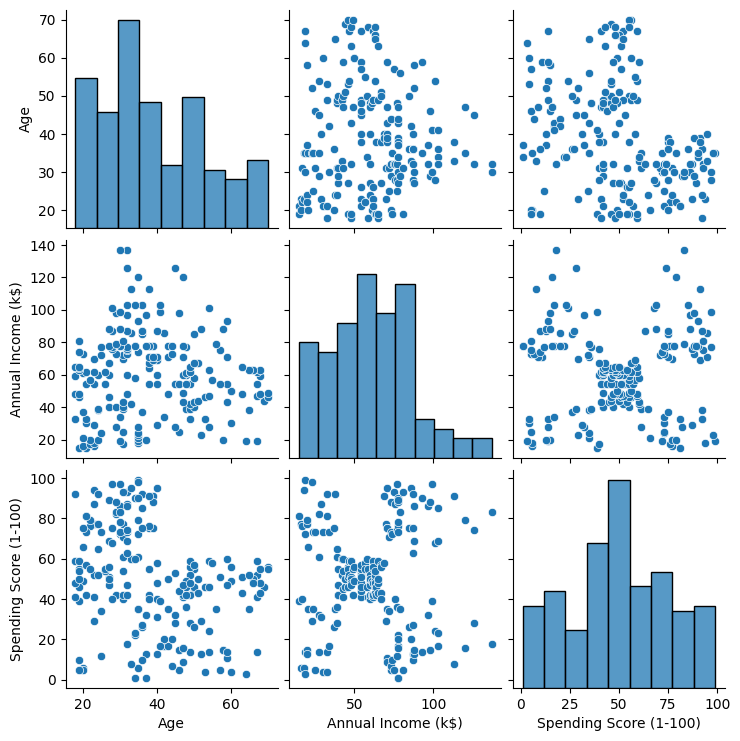

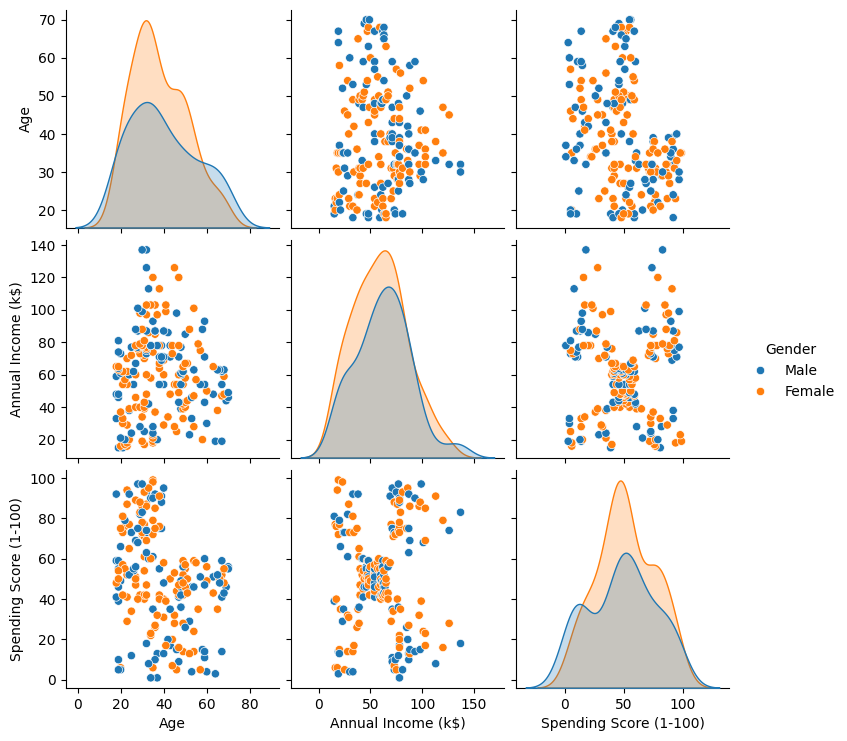

In [10]:
# making scatterplots
plt.figure(figsize=(10, 6))
sns.pairplot(df)

# using hue="Gender"
sns.pairplot(df, hue="Gender")

By using ```hue='Gender'```, we can see that the points on each scatterplot were identified based on the gender. 

### 3. Clustering

In order to identify the target clients, we will cluster the data, based on characteristcs such as `Annual Income` and `Spending Score` 

In [11]:
# creating a new dataset with only a few columns
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before working with K-Means Clustering, we must standardize the data.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Now, we can instantiate the K-Means algoritm from scikit-learn library, without specifying the number of clusters

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0)
kmeans.fit(X_std)

KMeans(random_state=0)

Once the data are fit, we can access labels from the labels_ attribute. Below, we visualize the data we just fit

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

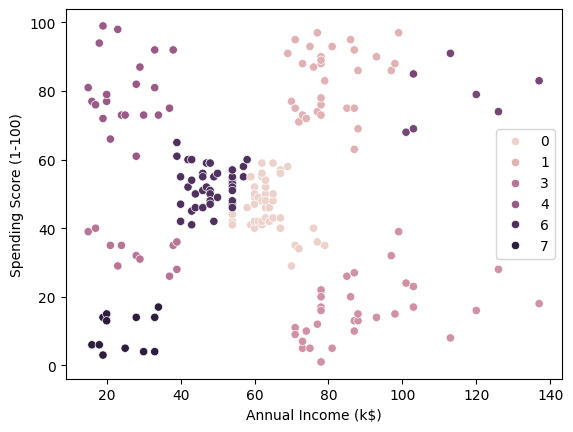

In [14]:
sns.scatterplot(data=X, x=df['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=kmeans.labels_)

The default number of clusters for the K-Means algorithm is 8, but by looking at the scatterplot, it's difficult to see distinct groups of data

##### Elbow Curve

In order to check if we got the right number of clusters, we can analyse its *elbow curve*

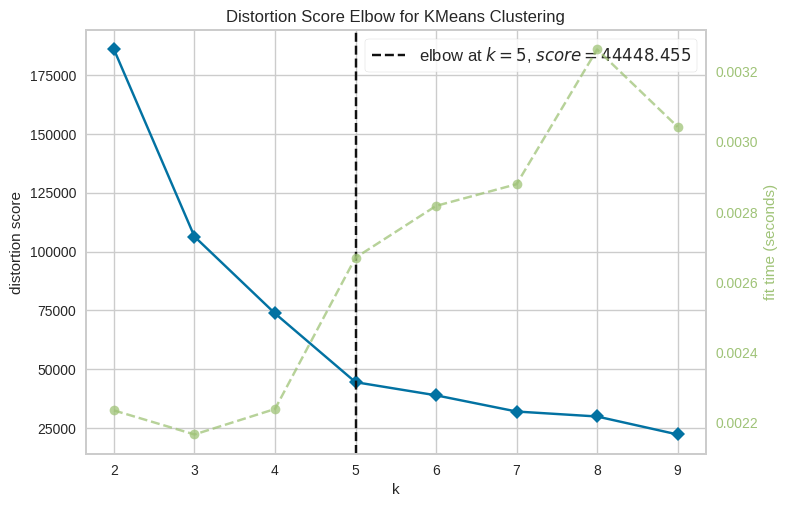

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from yellowbrick.cluster import KElbowVisualizer

K = range(2, 8)

km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)
visualizer.show()

As we can see from the graph, the selected value for k is 5

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

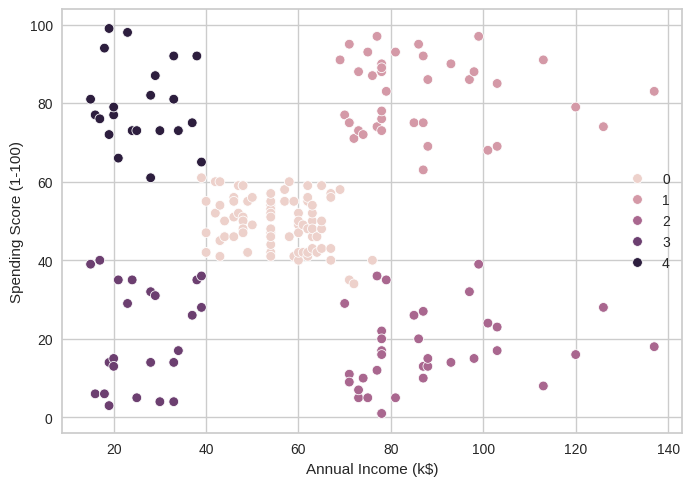

In [16]:
# create new model with adjusted number of clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_std)

sns.scatterplot(data=X, x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=kmeans.labels_)

The new scatter plot with adjusted number of clusters has more distinct groups than the one without this adjustment, from wich we can now see the group that has the highest spending score and it's more easily conversed.

Altough k=5 seems a good choice, k=6 also looks like a plausible elbow point

##### Silhouette Method

Another way to choose the optimal number of clusters is to use the *Silhouette Method*, so that we can confirm the best value for k

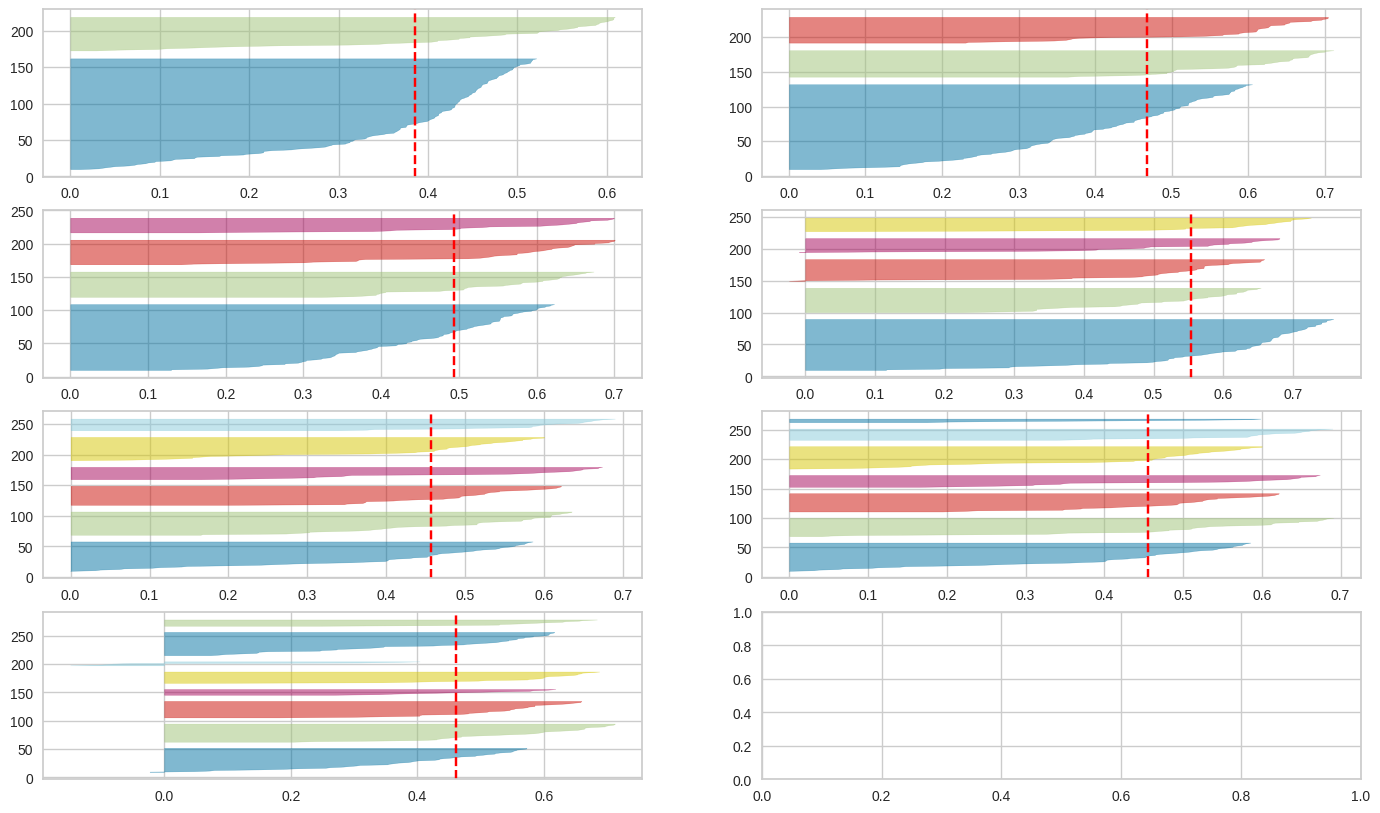

In [17]:
# importing silhouette curve visualizer
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(17,10))

n_clusters = [2, 3, 4, 5, 6, 7, 8]
for i in n_clusters:
    # create KMeans instances for different number of clusters
    km = KMeans(n_clusters=i, random_state=0)

    # determine the subplot location
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)


The following conditions should be checked to pick the right ‘k’ using the Silhouette plots:

1. For a particular K, all the clusters should have a Silhouette score greater than the average score of the data set represented by the red-dotted line. The x-axis represents the Silhouette score. 
2. There shouldn’t be wide fluctuations in the size of the clusters. The width of the clusters represents the number of data points. For k=1, the blue cluster has almost twice the width as compared to the green cluster. This blue cluster gets broken down into sub-clusters for k=3, k=4, k=5, k=..., until it forms clusters of uniform size.
   
So, the silhouette plot approach gives us k=6 as the optimal value.


Centroids:
 [[62.73469388 46.91836735]
 [86.53846154 82.12820513]
 [89.40625    15.59375   ]
 [25.14285714 19.52380952]
 [45.51282051 51.51282051]
 [24.95       81.        ]]


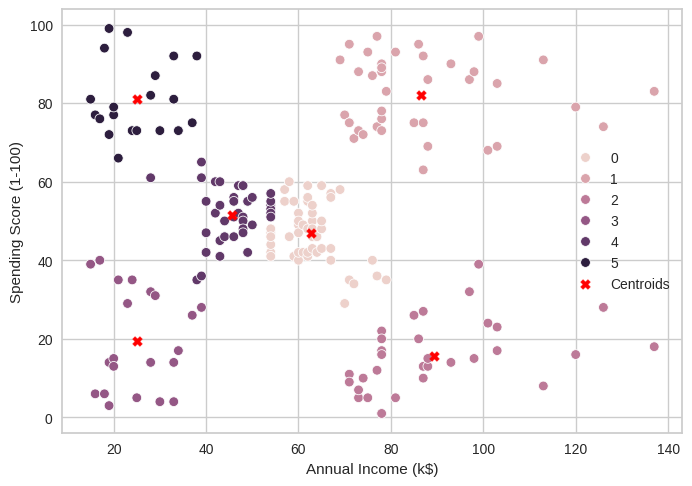

In [18]:
# create new model with 6 as the number of clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_std)

# Inverse transform the centroids to the original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Centroids:\n", centroids)

# Plot the scatterplot with the original data and cluster labels
sns.scatterplot(data=X, x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=kmeans.labels_)

# Plot the centroids on the same plot, now correctly scaled
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', label='Centroids')

# Show the plot with the centroids
plt.legend()
plt.show()


By looking at the plot, the groups of clients that can be easily conversed have an annual income around k$80-85 and a high spending score, since they are more the most likely buyers of the mall. 

#### References

Articles:
- https://www.datacamp.com/tutorial/k-means-clustering-python
- https://builtin.com/data-science/elbow-method#:~:text=The%20elbow%20method%20is%20a%20graphical%20method%20for%20finding%20the,the%20graph%20forms%20an%20elbow.

Notebooks:
- https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study